In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Data Gathering

In [2]:
df = pd.read_csv(r"E:\Datasets\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# EDA(Explpratory data analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Feature engineering

In [7]:
## outliers

In [8]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

lower_tail = q1-1.5*iqr
upper_tail = q3+1.5*iqr

outliers = (df<lower_tail) | (df>upper_tail)
outliers_count = outliers.sum()
print(outliers_count)

Time          0
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
Class       492
dtype: int64


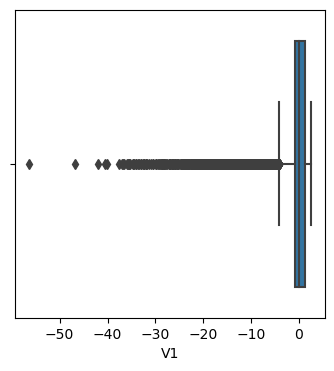

In [9]:
plt.figure(figsize=(4,4)) 

sns.boxplot(x=df["V1"])

plt.show()

In [10]:
## Handeling Outliers

-4.274396001792603
4.669664311280146
-2.7019605905224315
2.90713454829761
-3.7667054090861836
3.9035361133965982
-3.236612225031064
3.1313133981683787
-2.646882336821933
2.5672117056694685
-2.51858636568538
2.148855653580996
-2.240843806907704
2.2572040007487804
-1.0125931529838397
1.1313092708678223
-2.503452471089882
2.457493931105559
-2.0194494839425694
1.9379472025887527
-3.015625599764853
2.9927248115734812
-1.941285763020238
2.1539523105259604
-2.6151056869463822
2.629071347271788
-1.803659804964707
1.8712356417278626
-2.430441907369377
2.496378434529079
-1.955036385495261
2.010295931257707
-1.8088832582431966
1.7248099271865331
-1.9983346169934264
2.0002915652156013
-1.8291713305051371
1.8318217675233686
-0.7288646731770594
0.6501841494971068
-0.8505531720141558
0.8085354286142143
-2.148706384652634
2.1349096473259586
-0.6260789583212862
0.6118746771624517
-1.5457552412760254
1.630695705034713
-1.318935979464254
1.3525064882663698
-1.178888075273932
1.092856323107968
-0.31366650

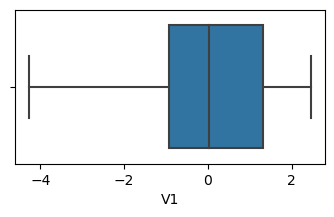

In [11]:
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"]
Finding_outliar1(df,columns)

plt.figure(figsize=(4,2))
sns.boxplot(x=df["V1"])
plt.show()


# Featutre selection

In [12]:
not_fraud=df[df.Class==0]
fraud=df[df.Class==1]

In [13]:
not_fraud_sample=not_fraud.sample(n=492)

In [14]:
df=pd.concat([not_fraud_sample,fraud],axis=0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13281,23410.0,1.245270,-1.126673,0.626076,-2.410797,-1.676419,-0.940532,-0.899586,-0.179523,2.199785,...,-0.267412,0.121358,-0.150600,0.504074,0.604172,-0.679979,0.075860,0.026073,64.0000,0
186796,127258.0,0.099029,0.927211,-0.345960,-0.619352,0.818207,-0.613502,0.804156,0.084080,-0.166054,...,-0.294161,-0.779024,0.106013,0.633881,-0.502858,0.090022,0.213010,0.073187,1.2900,0
187040,127360.0,-0.894834,1.205926,2.789718,3.131313,0.311813,2.027023,-0.207538,0.216454,-0.417466,...,-0.055434,0.511865,-0.387511,0.003385,0.135719,0.530624,0.291330,-0.120548,22.6600,0
254987,157012.0,1.936511,0.029581,-1.582617,1.324246,0.318803,-0.892675,0.494322,-0.218314,0.107951,...,0.107280,0.396456,-0.009413,-0.006888,0.369700,-0.510651,-0.030039,-0.069988,30.5800,0
19194,30087.0,-4.274396,2.907135,-3.766705,1.143014,-1.975997,-0.947109,-0.786023,1.131309,2.457494,...,-0.847541,-0.969171,-0.549431,-1.545755,0.295176,-0.425230,-0.313667,-0.249819,89.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-3.766705,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.611875,-0.294885,0.537503,0.788395,0.292680,0.147968,184.5125,1
280143,169347.0,1.378559,1.289381,-3.766705,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.333872,0.186637,0.7600,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.131309,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.333872,0.194361,77.8900,1
281144,169966.0,-3.113832,0.585864,-3.766705,1.817092,-0.840618,-2.518586,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.333872,-0.249819,184.5125,1


In [15]:
## Countplot

<Axes: xlabel='Class', ylabel='count'>

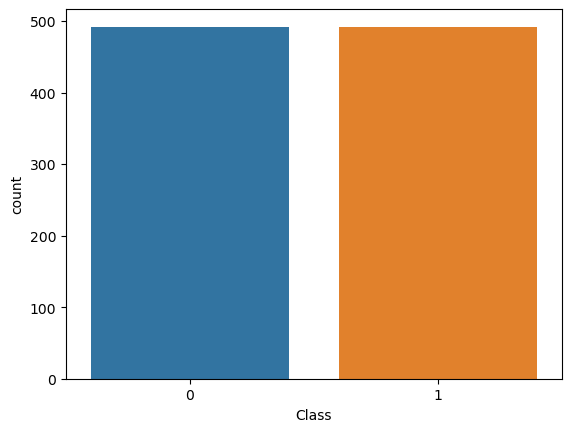

In [16]:
sns.countplot(x=df["Class"])

In [17]:
## Linearity

<Axes: >

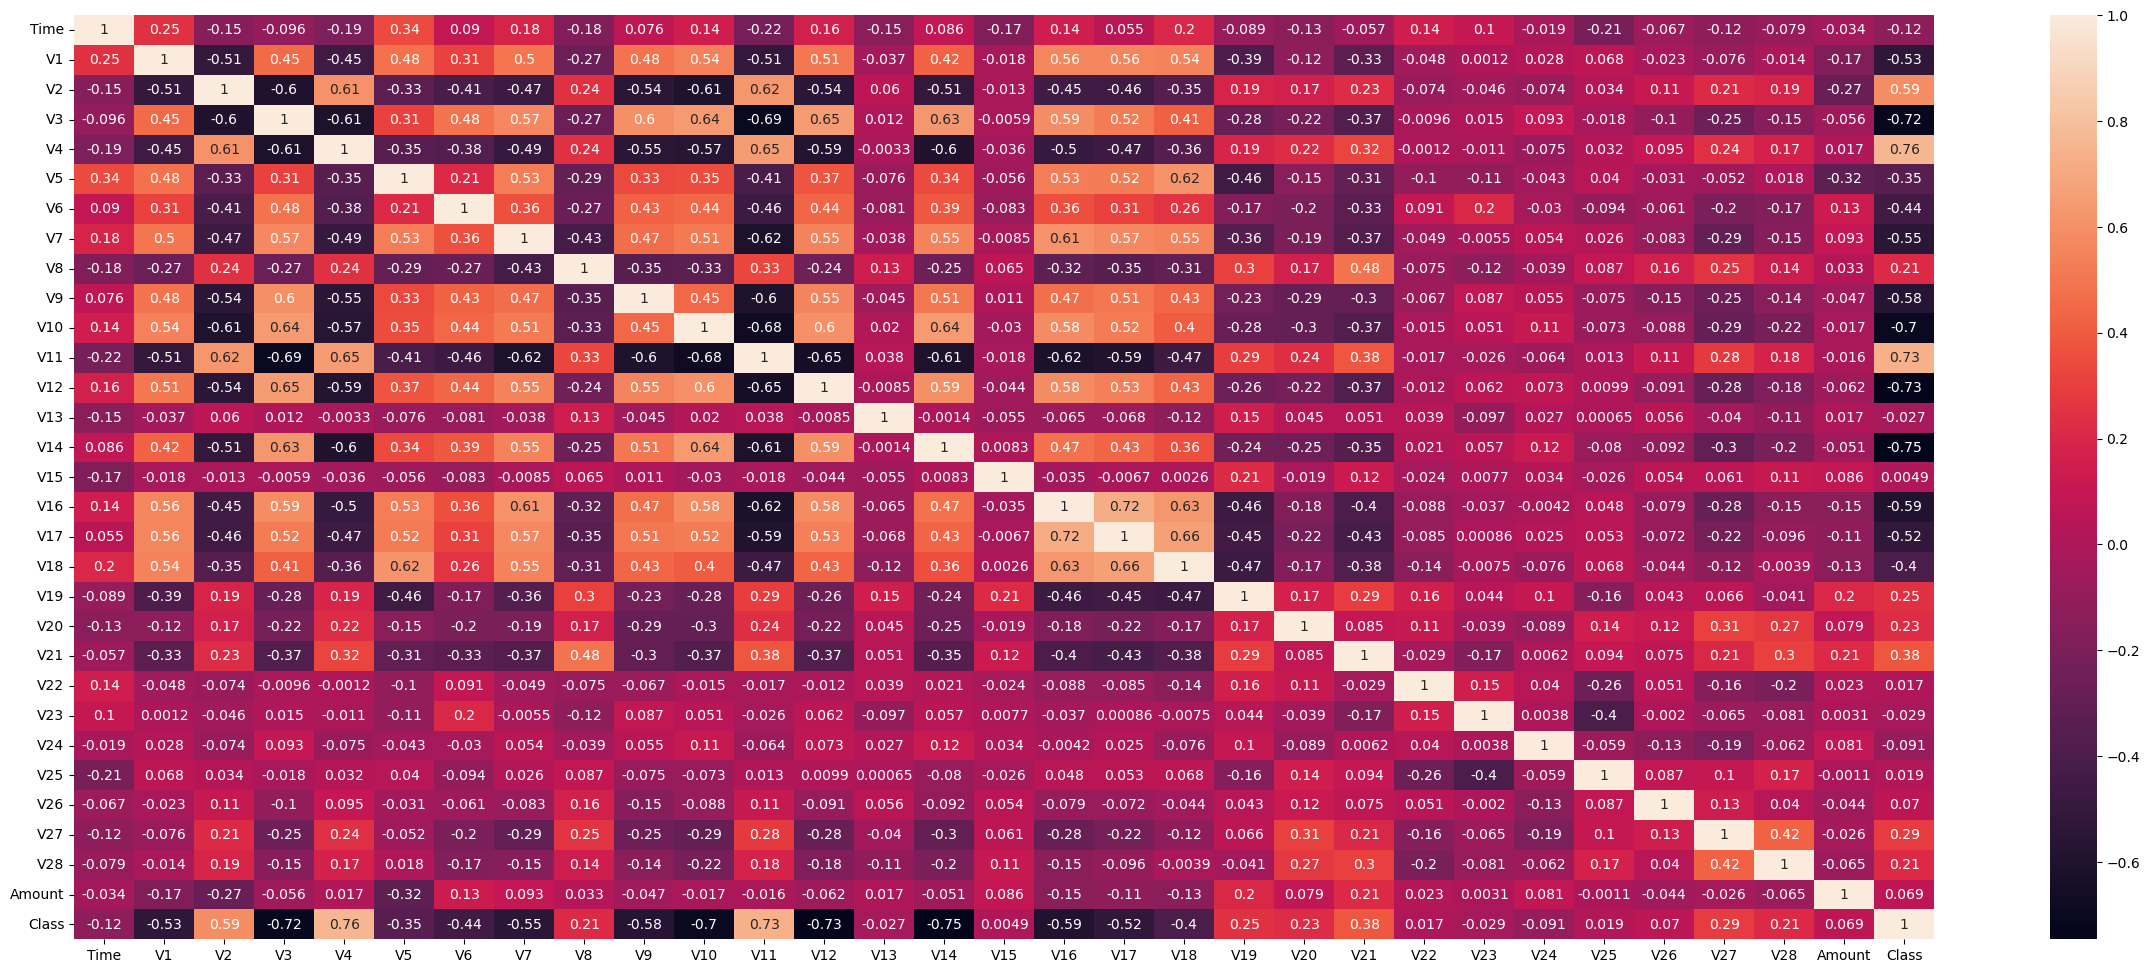

In [18]:
df.corr()
plt.figure(figsize=(30,12))
sns.heatmap(df.corr(),annot = True)

In [19]:
## Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
STD = StandardScaler()
std_array = STD.fit_transform(df.iloc[:,:30])
df5 = pd.DataFrame(std_array)
df5

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.321135,1.032516,-1.298894,1.020547,-2.079235,-0.747233,-0.236402,-0.099172,-0.636295,2.235588,...,-1.156949,-0.904441,0.120167,-0.379704,0.983943,0.970589,-1.541232,0.003471,-0.114159,0.149922
1,0.848272,0.502621,-0.010973,0.541241,-1.064883,0.892724,0.016076,1.232744,-0.239371,0.478079,...,-0.272804,-0.959380,-0.994553,0.360563,1.213774,-0.962346,0.168848,0.624941,0.164030,-0.789543
2,0.850403,0.043168,0.163799,2.087425,1.058816,0.559823,2.054653,0.441843,-0.040046,0.291312,...,1.401122,-0.469067,0.603636,-1.063133,0.097445,0.152645,1.147371,0.979836,-0.979877,-0.469397
3,1.469839,1.352070,-0.573847,-0.068546,0.035619,0.564418,-0.199455,0.990528,-0.694706,0.681629,...,-0.948864,-0.134876,0.460753,0.027589,0.079255,0.561188,-1.165174,-0.476394,-0.681348,-0.350747
4,-1.181651,-1.519169,1.230569,-1.145507,-0.066998,-0.944175,-0.241480,-0.010393,1.337512,2.427033,...,1.401122,-2.095948,-1.229965,-1.530236,-2.645398,0.431066,-0.975465,-1.761608,-1.743162,0.539281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1.723237,-0.434400,0.113463,-1.145507,0.276289,-0.674965,-1.062450,-0.086088,0.683861,-0.932549,...,1.401122,1.243892,-0.425253,1.819853,-0.430660,0.854180,1.719848,0.985954,0.605570,1.955333
980,1.727520,1.094134,0.216131,-1.145507,0.085222,0.645789,-0.534410,-0.500671,0.008246,-0.236073,...,0.376555,0.405973,0.004876,-0.365396,-0.052052,0.826893,1.611186,1.172610,0.833889,-0.797483
981,1.727603,0.144267,0.113910,-0.379729,-0.449029,-0.381801,0.487138,-1.142941,1.337512,0.116899,...,0.429300,1.188934,1.002589,0.605569,0.148233,-1.375876,1.015199,1.172610,0.879501,0.358010
982,1.740451,-0.982652,-0.225020,-1.145507,0.314679,-0.197781,-1.454714,-1.122038,1.228228,-0.611175,...,0.570170,0.842756,-0.363375,-1.261020,-0.233728,-0.657327,1.315028,1.172610,-1.743162,1.955333


In [21]:
x = df5
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.321135,1.032516,-1.298894,1.020547,-2.079235,-0.747233,-0.236402,-0.099172,-0.636295,2.235588,...,-1.156949,-0.904441,0.120167,-0.379704,0.983943,0.970589,-1.541232,0.003471,-0.114159,0.149922
1,0.848272,0.502621,-0.010973,0.541241,-1.064883,0.892724,0.016076,1.232744,-0.239371,0.478079,...,-0.272804,-0.959380,-0.994553,0.360563,1.213774,-0.962346,0.168848,0.624941,0.164030,-0.789543
2,0.850403,0.043168,0.163799,2.087425,1.058816,0.559823,2.054653,0.441843,-0.040046,0.291312,...,1.401122,-0.469067,0.603636,-1.063133,0.097445,0.152645,1.147371,0.979836,-0.979877,-0.469397
3,1.469839,1.352070,-0.573847,-0.068546,0.035619,0.564418,-0.199455,0.990528,-0.694706,0.681629,...,-0.948864,-0.134876,0.460753,0.027589,0.079255,0.561188,-1.165174,-0.476394,-0.681348,-0.350747
4,-1.181651,-1.519169,1.230569,-1.145507,-0.066998,-0.944175,-0.241480,-0.010393,1.337512,2.427033,...,1.401122,-2.095948,-1.229965,-1.530236,-2.645398,0.431066,-0.975465,-1.761608,-1.743162,0.539281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1.723237,-0.434400,0.113463,-1.145507,0.276289,-0.674965,-1.062450,-0.086088,0.683861,-0.932549,...,1.401122,1.243892,-0.425253,1.819853,-0.430660,0.854180,1.719848,0.985954,0.605570,1.955333
980,1.727520,1.094134,0.216131,-1.145507,0.085222,0.645789,-0.534410,-0.500671,0.008246,-0.236073,...,0.376555,0.405973,0.004876,-0.365396,-0.052052,0.826893,1.611186,1.172610,0.833889,-0.797483
981,1.727603,0.144267,0.113910,-0.379729,-0.449029,-0.381801,0.487138,-1.142941,1.337512,0.116899,...,0.429300,1.188934,1.002589,0.605569,0.148233,-1.375876,1.015199,1.172610,0.879501,0.358010
982,1.740451,-0.982652,-0.225020,-1.145507,0.314679,-0.197781,-1.454714,-1.122038,1.228228,-0.611175,...,0.570170,0.842756,-0.363375,-1.261020,-0.233728,-0.657327,1.315028,1.172610,-1.743162,1.955333


In [22]:
y = df["Class"]
y

13281     0
186796    0
187040    0
254987    0
19194     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3 , stratify = y,random_state=10)

# Model training

In [24]:
## Applied Logistric regression

In [25]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [26]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

1. Training data

In [27]:
y_pred_train = log_reg_model.predict(xtrain)

In [29]:
accuracy = accuracy_score(ytrain,y_pred_train)
print(f"Accuracy : {accuracy}")


confusionmatrix = confusion_matrix(ytrain,y_pred_train)
print(confusionmatrix)


class_report = classification_report(ytrain,y_pred_train)
print(class_report)


Accuracy : 0.9534883720930233
[[336   8]
 [ 24 320]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       344
           1       0.98      0.93      0.95       344

    accuracy                           0.95       688
   macro avg       0.95      0.95      0.95       688
weighted avg       0.95      0.95      0.95       688



2. Testing data

In [30]:
y_pred_test = log_reg_model.predict(xtest)
accuracy = accuracy_score(ytest,y_pred_test)
print(f"Accuracy : {accuracy}")


confusionmatrix = confusion_matrix(ytest,y_pred_test)
print(f"confusionmatrix: {confusionmatrix}")


class_report = classification_report(ytest,y_pred_test)
print(f"class_report:{class_report}")


Accuracy : 0.9358108108108109
confusionmatrix: [[139   9]
 [ 10 138]]
class_report:              precision    recall  f1-score   support

           0       0.93      0.94      0.94       148
           1       0.94      0.93      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [ ]:
## Confusion matrix

<Axes: >

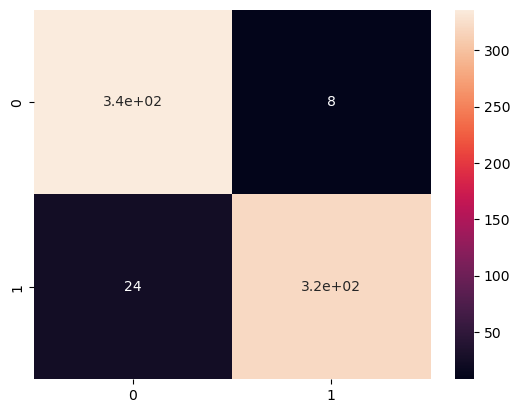

In [37]:
conf_matrix = confusion_matrix(ytrain,y_pred_train)
sns.heatmap(conf_matrix,annot=True)